<a href="https://colab.research.google.com/github/Ansh9728/Fraud_Detection/blob/main/Fraud_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc "https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV" -O "data.csv"


--2023-08-06 16:51:19--  https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV
Resolving drive.google.com (drive.google.com)... 142.250.145.138, 142.250.145.101, 142.250.145.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.145.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f2mlagopeig9tks9lj16jnej565s2kv6/1691340675000/18066994120134464539/*/1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV?e=download&uuid=472d2ea5-2697-41b1-9926-ff04b2054c9a [following]
--2023-08-06 16:51:19--  https://doc-08-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f2mlagopeig9tks9lj16jnej565s2kv6/1691340675000/18066994120134464539/*/1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV?e=download&uuid=472d2ea5-2697-41b1-9926-ff04b2054c9a
Resolving doc-08-3o-docs.googleusercontent.com (doc-08-3o-docs.googleusercontent.com)... 142.

In [2]:
import gc

In [3]:
gc.collect()

32

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

After looking the inforamtion of each column it is like a classification problem  isFraud is occur or not

so our target column isFraud

In [5]:
df = pd.read_csv("data.csv")

In [6]:
df.shape

(6362620, 11)

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5889196,403,CASH_IN,49438.99,C167041231,4486725.39,4536164.38,C368045526,961118.75,911679.76,0,0
4258142,306,PAYMENT,18195.70,C1487437990,6048.00,0.00,M639686119,0.00,0.00,0,0
853138,41,CASH_OUT,404543.43,C1673670202,0.00,0.00,C372972026,1017298.54,1421841.97,0,0
3197884,249,PAYMENT,23363.88,C376657945,0.00,0.00,M1102997041,0.00,0.00,0,0
5803004,401,PAYMENT,6166.13,C137023306,0.00,0.00,M1040375480,0.00,0.00,0,0
2728965,212,CASH_OUT,114812.68,C1241330381,0.00,0.00,C1497472072,545000.46,659813.14,0,0
5860536,402,TRANSFER,5376670.72,C1491210995,0.00,0.00,C514052086,17322597.59,22699268.31,0,0
5156680,357,PAYMENT,3458.30,C982763028,0.00,0.00,M566729650,0.00,0.00,0,0
1077719,129,CASH_IN,109707.02,C1608907521,6878624.71,6988331.73,C907042734,889875.76,435257.55,0,0
3428932,256,CASH_OUT,99980.45,C764327706,127229.00,27248.55,C1495222255,1795315.72,1895296.17,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# EDA

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [11]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<Axes: >

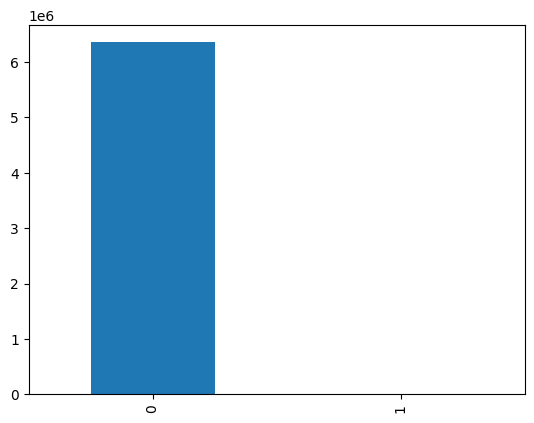

In [12]:
df['isFraud'].value_counts().plot(kind='bar')

looking this one data is Not balance

the higher number of person is fraud Which make model not work fine so we can solve this problem by using the ensemlbe method like random forest and gradient boosting

In [13]:
#check the null values

df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

their is no any null values are their

###  co- relation between each variable

In [14]:


df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<ipython-input-15-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

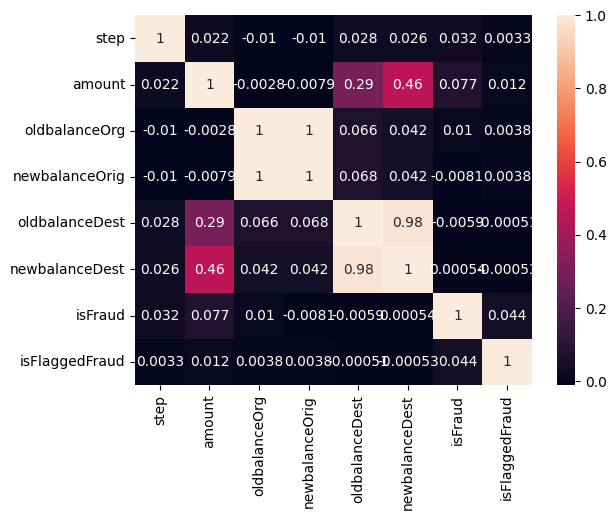

In [15]:
sns.heatmap(df.corr(),annot=True)

Above graph tells that

old balance destination and new balance destination is higle co-related with each other

<ipython-input-16-3aee5580c435>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['isFraud'].sort_values().drop('isFraud').plot(kind='bar')


<Axes: >

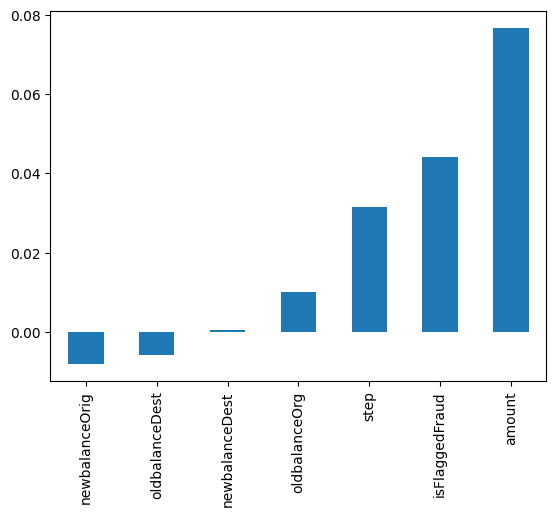

In [16]:
#this is telling the co-relation between the is fraud columns
df.corr()['isFraud'].sort_values().drop('isFraud').plot(kind='bar')

This graph tells that amount column ,isFlaggedFraud and step column is positively co related

In [17]:
df['nameOrig'].nunique()

6353307

In [18]:
df['nameDest'].nunique()

2722362

In [19]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [20]:
type_value = df['type'].value_counts()
type_value

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

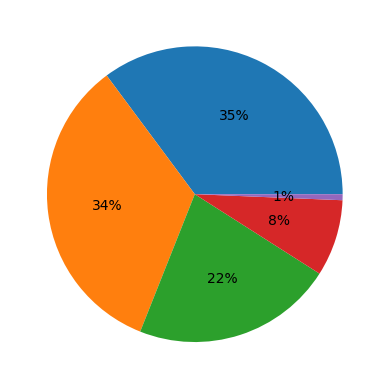

In [21]:
import matplotlib.pyplot as plt
plt.pie(data=df,x=type_value,autopct='%.0f%%')
plt.show()

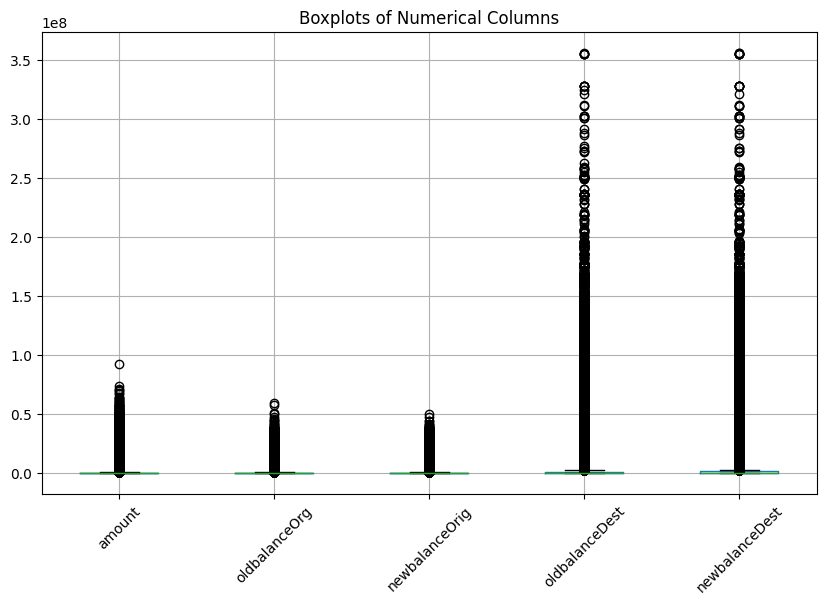

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

columns_for_boxplot = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

#boxplots for each column
plt.figure(figsize=(10, 6))
df[columns_for_boxplot].boxplot()
plt.title('Boxplots of Numerical Columns')
plt.xticks(rotation=45)
plt.show()


Looking this box plot old balnce dest and new balancese destinatio have highnumber of outlier

concolusion is data have large numbers of outliers are their

# Data Preprocessing and Feature Engineering

In [23]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3521761,259,CASH_OUT,160767.68,C1967963452,298.00,0.00,C1538523519,0.00,160767.68,0,0
5293392,373,CASH_IN,5643.95,C1828656859,14721.00,20364.95,C1736670064,362488.57,356844.62,0,0
1853844,164,CASH_IN,53211.02,C266063869,2056.00,55267.02,C1562100880,1159639.31,1106428.29,0,0
1932599,177,TRANSFER,970948.69,C839920592,0.00,0.00,C1484201446,1916655.84,2887604.53,0,0
3041092,234,PAYMENT,8125.14,C291011151,0.00,0.00,M317238959,0.00,0.00,0,0
6297478,681,CASH_OUT,224742.19,C868419409,0.00,0.00,C873814335,653434.16,878176.35,0,0
5709053,398,CASH_OUT,42983.45,C1427697611,0.00,0.00,C308249257,9000388.35,9043371.80,0,0
4944963,351,TRANSFER,1141408.50,C2130185866,23109.29,0.00,C1747371853,3227697.79,4369106.29,0,0
4780307,335,PAYMENT,5805.13,C2111984206,39669.00,33863.87,M389058743,0.00,0.00,0,0
2363250,190,PAYMENT,1779.76,C1272810964,0.00,0.00,M1501989628,0.00,0.00,0,0


### Step columns

In [24]:
#step column represent the time
#now i convert the step column into the proper time format for the analysis

df['hour_of_day']=df['step']%24
df['day_of_week'] = df['step'] //24%7   #0-7 data

df['day_of_month']=df['step'] // 24+1 #staring from 1

In [25]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day,day_of_week,day_of_month
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0,1


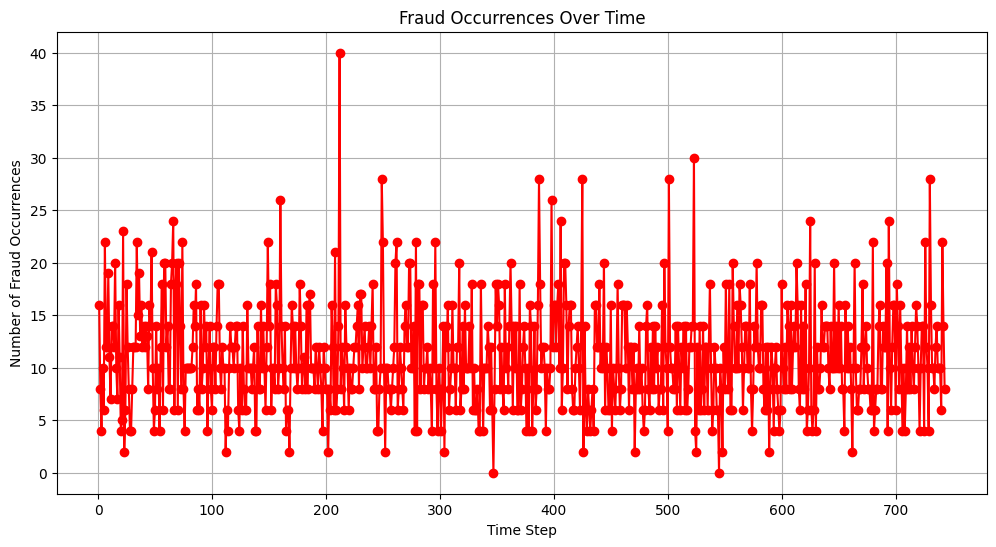

In [26]:
import matplotlib.pyplot as plt

# 'isFraud'  (1 - fraud, 0 - not fraud)
fraud_by_step = df.groupby('step')['isFraud'].sum()

# Plotting the number of fraud occurrences over time
plt.figure(figsize=(12, 6))
plt.plot(fraud_by_step.index, fraud_by_step.values, color='red', marker='o', linestyle='-')
plt.xlabel('Time Step')
plt.ylabel('Number of Fraud Occurrences')
plt.title('Fraud Occurrences Over Time')
plt.grid(True)
plt.show()


In [27]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day,day_of_week,day_of_month
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0,1


### Feature Engineering in Name Origin and NAmeDest columns

In [28]:
# Account Transaction Frequency i.e how much tranction done by same account very useful aspet of feture engineering

org_acc_freq = df['nameOrig'].value_counts()

df['orig_acc_freq'] = df['nameOrig'].map(org_acc_freq)

des_acc_freq=df['nameDest'].value_counts()

df['des_acc_freq'] = df['nameDest'].map(des_acc_freq)

In [29]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day,day_of_week,day_of_month,orig_acc_freq,des_acc_freq
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0,1,1,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0,1,1,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,0,1,1,44
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,1,1,41
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0,1,1,1


In [30]:
#for origin
avg_transaction_amount_per_orgin = df.groupby('nameOrig')['amount'].mean()#groupby only on amount columns

df['avg_transaction_amount_per_orgin_Account'] = df['nameOrig'].map(avg_transaction_amount_per_orgin)

#for Dest

avg_transaction_amount_per_Dest = df.groupby('nameDest')['amount'].mean()#groupby only on amount columns

df['avg_transaction_amount_per_Dest_Account'] = df['nameDest'].map(avg_transaction_amount_per_Dest)

In [31]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day,day_of_week,day_of_month,orig_acc_freq,des_acc_freq,avg_transaction_amount_per_orgin_Account,avg_transaction_amount_per_Dest_Account
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0,1,1,1,9839.64,9839.640000
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0,1,1,1,1864.28,1864.280000
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,0,1,1,44,181.00,225517.832045
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,1,1,41,181.00,439444.208049
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0,1,1,1,11668.14,11668.140000


## Feature Engineering on the column oldbalanceOrg	newbalanceOrig oldbalanceDest	newbalanceDest

In [32]:
#for origin balance
df['diff_old_new_Balance_origin'] = abs(df['newbalanceOrig']-df['oldbalanceOrg'])#balance account cannot be negative so that why we use this positive

#for the destination balance

df['diff_old_new_Balance_dest']= abs(df['newbalanceDest']-df['oldbalanceDest'])

In [33]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day,day_of_week,day_of_month,orig_acc_freq,des_acc_freq,avg_transaction_amount_per_orgin_Account,avg_transaction_amount_per_Dest_Account,diff_old_new_Balance_origin,diff_old_new_Balance_dest
2507703,205,PAYMENT,8846.92,C2057827291,64061.00,55214.08,M2115528895,0.00,0.00,0,0,13,1,9,1,1,8846.92,8.846920e+03,8846.92,0.00
5619635,395,CASH_OUT,108396.22,C299565306,0.00,0.00,C1905456339,460248.62,568644.83,0,0,11,2,17,1,7,108396.22,2.765560e+05,0.00,108396.21
2964354,231,CASH_OUT,64659.18,C1946903893,832.00,0.00,C900609931,277424.47,342083.65,0,0,15,2,10,1,16,64659.18,1.598269e+05,832.00,64659.18
3850752,282,PAYMENT,6856.15,C408240301,0.00,0.00,M476220787,0.00,0.00,0,0,18,4,12,1,1,6856.15,6.856150e+03,0.00,0.00
4872903,348,CASH_IN,41473.10,C1554973184,1733218.16,1774691.26,C1357662913,127611.10,86138.00,0,0,12,0,15,1,1,41473.10,4.147310e+04,41473.10,41473.10
4662042,330,CASH_OUT,193082.04,C489816524,0.00,0.00,C505814752,859233.32,1052315.36,0,0,18,6,14,1,13,193082.04,4.919184e+05,0.00,193082.04
4570819,327,PAYMENT,20451.04,C1587699169,0.00,0.00,M2139212070,0.00,0.00,0,0,15,6,14,1,1,20451.04,2.045104e+04,0.00,0.00
3003335,232,CASH_OUT,108572.09,C1604573717,69011.00,0.00,C1676070690,893139.15,1001711.23,0,0,16,2,10,1,16,108572.09,1.284147e+05,69011.00,108572.08
5868627,403,CASH_OUT,245442.85,C1710240916,0.00,0.00,C1103229512,43776341.96,44021784.81,0,0,19,2,17,1,12,245442.85,1.768567e+06,0.00,245442.85
5152266,357,CASH_IN,470069.99,C1873105882,168260.74,638330.73,C1859439136,7541966.61,7071896.63,0,0,21,0,15,1,20,470069.99,1.955703e+05,470069.99,470069.98


### TYPE Column
in this we can use so many technique to make it numerical

 we can use the One hot encoding or we can use dummy variable BUT It will create the problem of multicollinarity means we have large number of spare data

 for avoid the multicolinarity here by simple custom mapping but if we have large unique value it will not help we can use than different technnique like prinicipal component analysis i am here done with the


 custom mapping for this problem set

In [34]:
 #mostly have cash_out and payment are use

In [35]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [36]:
mapping={
    'CASH_OUT':0,
    'PAYMENT':1,
    'CASH_IN':2,
    'TRANSFER':3,
    'DEBIT':4,
}

df['type_encoded'] = df['type'].map(mapping)

In [37]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,hour_of_day,day_of_week,day_of_month,orig_acc_freq,des_acc_freq,avg_transaction_amount_per_orgin_Account,avg_transaction_amount_per_Dest_Account,diff_old_new_Balance_origin,diff_old_new_Balance_dest,type_encoded
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,...,1,0,1,1,1,9839.64,9839.640000,9839.64,0.0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,...,1,0,1,1,1,1864.28,1864.280000,1864.28,0.0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,...,1,0,1,1,44,181.00,225517.832045,181.00,0.0,3
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,...,1,0,1,1,41,181.00,439444.208049,181.00,21182.0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,...,1,0,1,1,1,11668.14,11668.140000,11668.14,0.0,1


### Scaling the Numerical feature to make it into the Noramal scale we can use different approached such as

log transforme

reciprocal
square root

this all are the mostly used transformer which is called function transformer

In [38]:
#Required column for further analysis are

req_df=df.drop(['step','type','nameOrig','nameDest'],axis=1)#we are droping these column because it doesnot help any further analysis

In [39]:
#now we will do analysis on that columns
req_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day,day_of_week,day_of_month,orig_acc_freq,des_acc_freq,avg_transaction_amount_per_orgin_Account,avg_transaction_amount_per_Dest_Account,diff_old_new_Balance_origin,diff_old_new_Balance_dest,type_encoded
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,1,0,1,1,1,9839.64,9.839640e+03,9839.64,0.00,1
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,1,0,1,1,1,1864.28,1.864280e+03,1864.28,0.00,1
2,181.00,181.00,0.00,0.00,0.00,1,0,1,0,1,1,44,181.00,2.255178e+05,181.00,0.00,3
3,181.00,181.00,0.00,21182.00,0.00,1,0,1,0,1,1,41,181.00,4.394442e+05,181.00,21182.00,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,1,0,1,1,1,11668.14,1.166814e+04,11668.14,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0,23,2,31,1,2,339682.13,3.323914e+05,339682.13,339682.13,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,23,2,31,1,1,6311409.28,6.311409e+06,6311409.28,0.00,3
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,23,2,31,1,3,6311409.28,2.212471e+06,6311409.28,6311409.27,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,23,2,31,1,1,850002.52,8.500025e+05,850002.52,0.00,3


<Axes: >

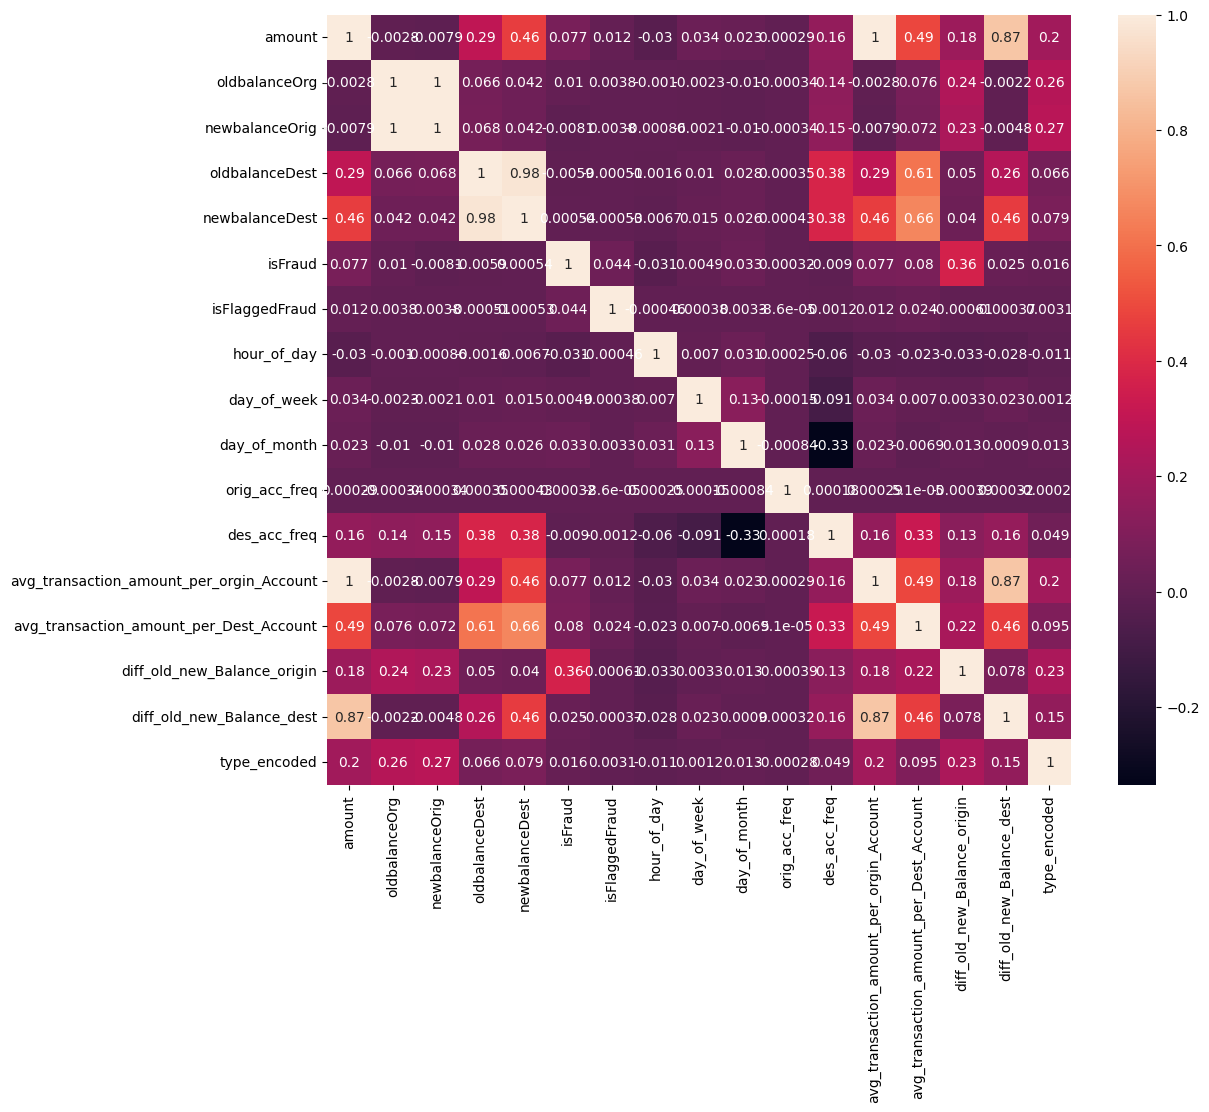

In [40]:
plt.figure(figsize=(12,10))

sns.heatmap(req_df.corr(),annot=True)

telling the relation between all the columns

<Axes: >

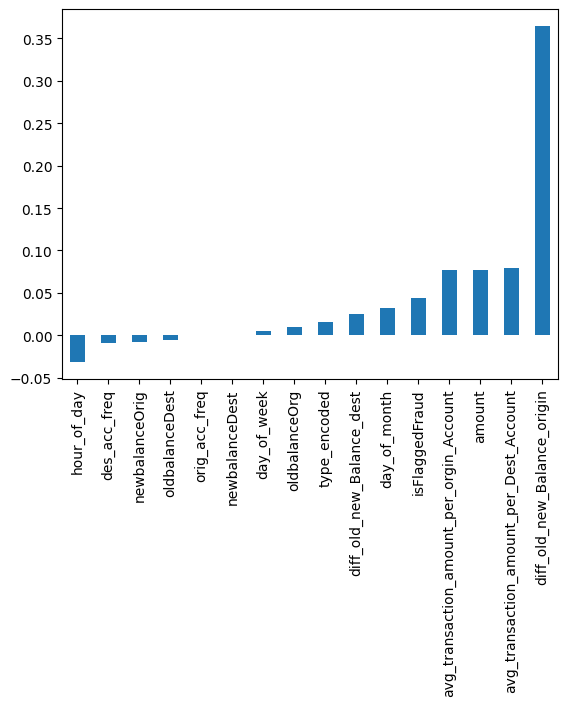

In [41]:
req_df.corr()['isFraud'].sort_values().drop('isFraud').plot(kind='bar')

above graph tells co-relation between required column above graph completerly tell taken feature for further anaysis are helpful

in this diff_old_Balance_origin have high positive correlation


In [42]:
req_df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day,day_of_week,day_of_month,orig_acc_freq,des_acc_freq,avg_transaction_amount_per_orgin_Account,avg_transaction_amount_per_Dest_Account,diff_old_new_Balance_origin,diff_old_new_Balance_dest,type_encoded
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0,1,1,1,9839.64,9839.640000,9839.64,0.0,1
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0,1,1,1,1864.28,1864.280000,1864.28,0.0,1
2,181.00,181.0,0.00,0.0,0.0,1,0,1,0,1,1,44,181.00,225517.832045,181.00,0.0,3
3,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,1,1,41,181.00,439444.208049,181.00,21182.0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0,1,1,1,11668.14,11668.140000,11668.14,0.0,1


In [43]:
req_df.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'hour_of_day',
       'day_of_week', 'day_of_month', 'orig_acc_freq', 'des_acc_freq',
       'avg_transaction_amount_per_orgin_Account',
       'avg_transaction_amount_per_Dest_Account',
       'diff_old_new_Balance_origin', 'diff_old_new_Balance_dest',
       'type_encoded'],
      dtype='object')

In [44]:

#now i am using the Scaler to make to normal scale for better analysis
# I am using the robust scaler which scaling in their quratile range and also RObust scaler is very robust to the outliers

from sklearn.preprocessing import RobustScaler

In [45]:
scaler  = RobustScaler()

numerical_col_scale=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest','orig_acc_freq', 'des_acc_freq',
       'avg_transaction_amount_per_orgin_Account',
       'avg_transaction_amount_per_Dest_Account',
       'diff_old_new_Balance_origin', 'diff_old_new_Balance_dest',]

req_df[numerical_col_scale] = scaler.fit_transform(req_df[numerical_col_scale])

In [46]:
req_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_day,day_of_week,day_of_month,orig_acc_freq,des_acc_freq,avg_transaction_amount_per_orgin_Account,avg_transaction_amount_per_Dest_Account,diff_old_new_Balance_origin,diff_old_new_Balance_dest,type_encoded
0,-0.332932,1.452991,1.111175,-0.140722,-0.193057,0,0,1,0,1,0.0,-0.3750,-0.334057,-0.651085,0.049614,-0.306367,1
1,-0.373762,0.065610,0.134375,-0.140722,-0.193057,0,0,1,0,1,0.0,-0.3750,-0.374904,-0.686041,-0.104609,-0.306367,1
2,-0.382380,-0.130708,0.000000,-0.140722,-0.193057,1,0,1,0,1,0.0,2.3125,-0.383525,0.294243,-0.137160,-0.306367,3
3,-0.382380,-0.130708,0.000000,-0.118260,-0.193057,1,0,1,0,1,0.0,2.1250,-0.383525,1.231893,-0.137160,-0.202877,0
4,-0.323571,0.254820,0.207169,-0.140722,-0.193057,0,0,1,0,1,0.0,-0.3750,-0.324692,-0.643071,0.084973,-0.306367,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.355693,3.032881,0.000000,-0.140722,0.112438,1,0,23,2,31,0.0,-0.3125,1.355268,0.762675,6.427942,1.353246,0
6362616,31.927899,58.679504,0.000000,-0.140722,-0.193057,1,0,23,2,31,0.0,-0.3750,31.940137,26.969010,121.906200,-0.306367,3
6362617,31.927899,58.679504,0.000000,-0.068096,5.544730,1,0,23,2,31,0.0,-0.2500,31.940137,9.003158,121.906200,30.529808,0
6362618,3.968274,7.788223,0.000000,-0.140722,-0.193057,1,0,23,2,31,0.0,-0.3750,3.968931,3.031391,16.296262,-0.306367,3


Now We will train our model for the required column

all feature engineering steps done

# Train Test Split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X=req_df.drop(['isFraud','isFlaggedFraud'],axis=1)
y=req_df['isFraud']

In [49]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)  #we use stratify because data is in imbalnce format


In [50]:
X_train.shape

(4453834, 15)

In [51]:
X_test.shape

(1908786, 15)

# Training the Model

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

### Random Forest Classifier

In [54]:
rfc=RandomForestClassifier()

In [55]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
prediction = rfc.predict(X_test)

### Hist Gradient Boosting

In [57]:
clf = HistGradientBoostingClassifier()

In [58]:
clf.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [59]:
prediction_XGp = clf.predict(X_test)

### Gradient Boosting

In [60]:
gbc=GradientBoostingClassifier()

In [61]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [62]:
prediction_Gbc = gbc.predict(X_test)

# Model evaluation

### Random Forest Classifier

In [63]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [64]:
accuracy_score(y_test,prediction)

0.9997427684402547

In [65]:
confusion_matrix(y_test,prediction)

array([[1906297,      25],
       [    466,    1998]])

In [66]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.99      0.81      0.89      2464

    accuracy                           1.00   1908786
   macro avg       0.99      0.91      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786



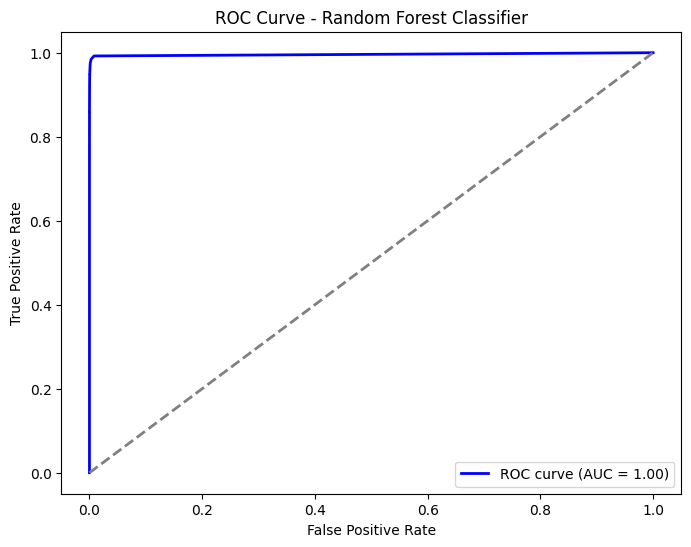

In [67]:
import matplotlib.pyplot as plt
y_prob = rfc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)



# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

### Hist Boosting

In [68]:
accuracy_score(y_test,prediction_XGp)

0.9995562624621094

In [69]:
confusion_matrix(y_test,prediction_XGp)

array([[1906015,     307],
       [    540,    1924]])

In [70]:
print(classification_report(y_test,prediction_XGp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.86      0.78      0.82      2464

    accuracy                           1.00   1908786
   macro avg       0.93      0.89      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



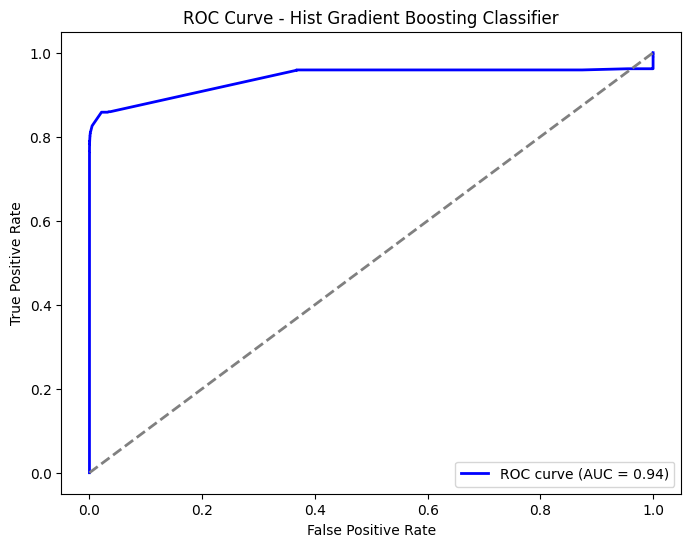

In [71]:
import matplotlib.pyplot as plt
y_prob = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)



# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Hist Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.show()

### Gradient Boosting

In [72]:
accuracy_score(y_test,prediction_Gbc)

0.9942471288033337

In [73]:
confusion_matrix(y_test,prediction_Gbc)

array([[1896744,    9578],
       [   1403,    1061]])

In [74]:
print(classification_report(y_test,prediction_Gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906322
           1       0.10      0.43      0.16      2464

    accuracy                           0.99   1908786
   macro avg       0.55      0.71      0.58   1908786
weighted avg       1.00      0.99      1.00   1908786



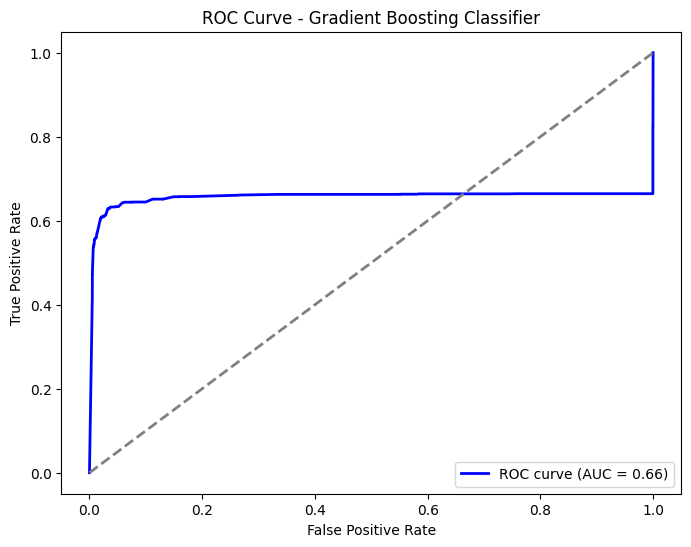

In [75]:
import matplotlib.pyplot as plt
y_prob = gbc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)



# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.show()

# Summary and Conclusion

### Data cleaning including missing values, outliers and multi-collinearity

Dealing With outliers missing values and reduce time multi-collinearity all this steps comes into the Data cleaning Process

in that step we clean the data means we make it better for further analysis we can done follwing steps in it

<b>Missing Value</b>: We have to remove the missing value from my data. It will give Benefits Such as Faster Processing, Improved Data Quality, Simplified Analysis

<b>Outliers:</b> outliers are such a Data point which is totally  different from all my other data points. Handling of outliers totally depend on the Domain Knowledge if we have small number of outliers or dont much affect my analysis we simply drop it

i.e Outliers handling totally depend on the domain knowledge

<b>Multi-Collinearity:</b> this is a statical phenomena which arise when two or more independent variable are highly correlated with each other. It will result unstable and inconsistent coefficient. Simply It arise when we encode the categorical variable. BY encoding the categorical variable it may introduce the sparse error which is responsibe for multicollinearity. we can  use Principal Component Analysis to reduce the multi collinarity some other method are also their

### fraud detection model in elaboration.

we can make fraud Detection By using the so many technique such as machine learning and Neural Network

But in my case i am using the machine learning approach to solve that type of problem.
For Developing the optimal Fraud Detection system by using machine learning i  perform some task such as

<ol>
<li>I am using the ensemble learning approach to solve this problem I have done with most popular ensemle learning model such as Random Forest and XGBoost becuase it is robust to outliers and also handle the imbalnce data set</li>
<li>I have also Done some of the Feature Engineering to increase the model performance we create some new column and and also drop some column for analysis I have created some new column for such as we use the frequency of origin and destination column to develop new feature on the amount column I have caluclated the average amount  this are the some way to create new columns for further analysis</li>
<li>Also I perform scaling to make all the feature into the same scale i am using the robust scaler to scale the feature because robust scaler is so powerful for outlier it use the inter quratile range(IQR) for scaling the Feature</li>
<li>After the we use some of the model evalution technique to check the performance of our model random forest classifier have high accuracy than any other model I have used</li>

</ol>

###  selected variables included in the model?
<ol>
<li>
This steps is also known as Feature selection steps it is very crucial and important steps in any of machine learning problem in which we select most relevent feature for analysis the feature selected by me as
</li>
<li>
my correlation graph shows that which feature is higly postive related to my target column higly positive co related feature must we have to take because it will help us better the model performance
</li>
<li>
feature select by as amount
this is selcted because amount column is very neccesary to take transfer
</li>

<li>I used the steps columns to make time based feature it is becasue it is very useful in fraud detectionsystem on the real time so it is very important feature
</li>
<li>
simply feature selection is also higly related to domain knowledge to select the best feature for the analysis
</li>
</ol>

### key factors that predict fraudulent customer?

There is so many keys factor used to predict the frauulent custome such as

<li>we have created some time realted feature for detecting the fraud identify which time most amount transfer which specific time such as moring evening how much interval of time
</li>
<li>
amount column is also tell Large and unusual transaction amounts may indicate fraudulent activity.
</li>
<li>
destination and origin account balance changes very subsequently it will also help to detect the fraud
</li>
this are some key factor help us to detect



### prevention should be adopted while company update its infrastructure?

while updating the company infrastructure we can take follwing prevention measure such as
<li>
we can use the real time monitoring system to detect  suspicious activities, anomalies to detect the fraud
</li>
<li>
we can make transction limit and rule for the transfer any amount
</li>
<li>

ensure data protection give the access to the authorized user
</li>
<li>
we can use the multi factor authentication technique to stop fraud detection activities
</li>
<li>
upgrade and maintain our system on regulary basis to ensure the system performance
</li>




### Assuming these actions have been implemented, how would you determine if they work?

if all the task is implimented we can determine by the basis of follwing ways such as:
<li>
we can update and monitor all the sytem on the regular basic to ensure that any fraud will not occur
</li>
<li>

Performance Metrics: usingthe key performance metrics to measure the success of the fraud prevention system. Common metrics include the no of detected fraud and accuracy score
</li>
<li>

we can use the historical data analysis to check if any fraud occur then how it handle and solve it
</li>
<li>
Conducting periodic reviews of the fraud prevention system's performance to identif is thier any wekeness and make necessary enhancements.
</li>